In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [5]:
# Load dataset
data = pd.read_csv("Dry_Bean_Dataset.csv")

# Assume last column is target (modify if needed)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [6]:
results = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=i
    )
    
    best_acc = 0
    best_params = None
    acc_progress = []  # for convergence tracking
    
    # 100 iterations of random search
    for iteration in range(100):
        # Randomly choose parameters
        kernel = np.random.choice(['linear', 'rbf', 'poly', 'sigmoid'])
        C = 10 ** np.random.uniform(-2, 2)    # penalty parameter
        gamma = 'scale' if kernel == 'linear' else 10 ** np.random.uniform(-3, 1)
        
        clf = SVC(kernel=kernel, C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred) * 100
        acc_progress.append(acc)
        
        if acc > best_acc:
            best_acc = acc
            best_params = (kernel, C, gamma)
    
    results.append((f"S{i}", best_acc, best_params, acc_progress))


In [7]:
df_results = pd.DataFrame(
    [(s, acc, params) for s, acc, params, _ in results],
    columns=["Sample #", "Best Accuracy", "Best SVM Parameters (Kernel, C, Gamma)"]
)

print(df_results)


  Sample #  Best Accuracy             Best SVM Parameters (Kernel, C, Gamma)
0       S1      97.613365     (rbf, 3.2873193142902957, 0.07373075513672926)
1       S2      95.942721     (rbf, 10.86892833568174, 0.007156874479266897)
2       S3      95.226730                 (linear, 40.97673495520394, scale)
3       S4      97.852029      (rbf, 34.91731383537429, 0.09554500502485416)
4       S5      96.181384    (rbf, 0.8970165611774013, 0.028672665606932223)
5       S6      96.897375      (rbf, 14.10956662489225, 0.16277972209346034)
6       S7      96.897375               (linear, 0.07202994423566242, scale)
7       S8      96.181384    (poly, 0.16873734150649647, 0.4164828228264385)
8       S9      97.136038  (sigmoid, 40.38654962088949, 0.006691492985933...
9      S10      94.988067      (rbf, 49.08994419871012, 0.06491399844066952)


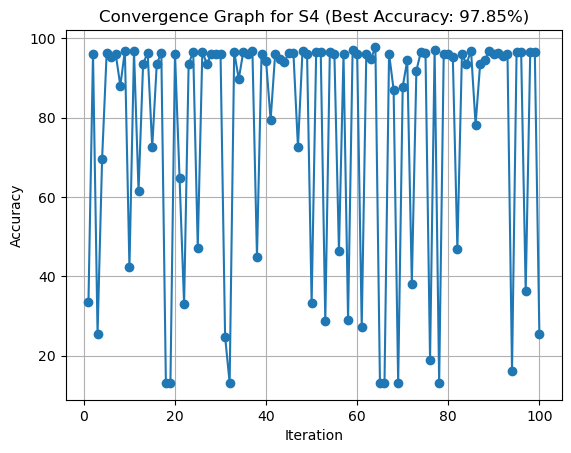

In [8]:
# Find sample with max accuracy
best_sample = max(results, key=lambda x: x[1])
sample_name, best_acc, best_params, acc_progress = best_sample

plt.plot(range(1,len(acc_progress) + 1), acc_progress, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title(f"Convergence Graph for {sample_name} (Best Accuracy: {best_acc:.2f}%)")
plt.grid(True)
plt.show()
